In [80]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from PIL import Image
import io

In [4]:
with open("./data_inputs/day17_input.txt") as f:
    jet_dirs = f.read()

In [27]:
rocks = [
    np.array(
        [[1,1,1,1]]
    ),
    np.array(
        [[0,1,0],
         [1,1,1],
         [0,1,0]]
    ),
    np.array(
        [[0,0,1],
         [0,0,1],
         [1,1,1]]
    ),
    np.array(
        [[1],
         [1],
         [1],
         [1]]
    ),
    np.array(
        [[1,1],
         [1,1]]
    ),
]

get_highest_rock = lambda chamber_map: np.max(np.where(np.all(chamber_map == 0, axis=1))) + 1

is_in_boundaries = lambda h, w, rock, i, j: (h >= rock.shape[0] + i) and (w >= rock.shape[1] + j) and (0 <= j)

is_hit = lambda chamber_map, rock, i, j: np.any((chamber_map[i : i+rock.shape[0], j : j+rock.shape[1]] + rock) > 1)

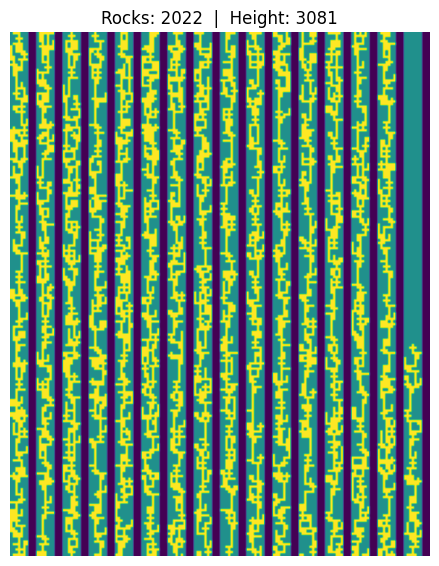

In [98]:
# Plot and GIF functions

def map_to_frame(chamber_map, divs):
    h = (chamber_map.shape[0] // divs)
    frame = np.zeros((h, 10*divs))
    for d in range(divs):
        crop = chamber_map[d*h : (d+1)*h] + 1
        frame[:, (divs-d-1)*10 : (divs-d-1)*10+7] += crop

    return frame

In [103]:
# ---- Part 1 ----

TOTAL_ROCKS = 2022
chamber_map = np.zeros((3200, 7))
H, W = chamber_map.shape[0], chamber_map.shape[1]
step = 0

plot_map = chamber_map.copy()
frames = []

for r in tqdm(range(TOTAL_ROCKS)):
    is_rest = False
    rock = rocks[r % len(rocks)]

    # Inital position
    (i, j) = (get_highest_rock(chamber_map) - rock.shape[0] - 3, 2)
    
    while not is_rest:
        # Lateral Jet mov
        dir = jet_dirs[step % len(jet_dirs)]
        # print(dir)
        if dir == "<" and is_in_boundaries(H, W, rock, i, j-1) and not is_hit(chamber_map, rock, i, j-1):
            j -= 1
        elif dir == ">" and is_in_boundaries(H, W, rock, i, j+1) and not is_hit(chamber_map, rock, i, j+1):
            j += 1

        # Down
        if is_in_boundaries(H, W, rock, i+1, j) and not is_hit(chamber_map, rock, i+1, j):
            i += 1

        else:
            chamber_map[i : i+rock.shape[0], j : j+rock.shape[1]] += rock
            is_rest = True
            plot_map[i : i+rock.shape[0], j : j+rock.shape[1]] += (rock * 2)
            if r%2 == 0:
                frame = map_to_frame(plot_map, 16)
                plt.figure(figsize=(5,7))
                plt.imshow(frame)
                plt.title(f"Rocks: {r+1}    Height: {H - get_highest_rock(chamber_map)}")
                plt.axis("off")
                plt.tight_layout()
                buf = io.BytesIO()
                plt.savefig(buf, format="png")
                buf.seek(0)
                frames.append(Image.open(buf))
                plt.close()

        step += 1


frame_one = frames[0]
frame_one.save("day17_part_1.gif", format="GIF", append_images=frames, save_all=True, duration=25, loop=0)
    
max_alt = H - get_highest_rock(chamber_map)

print("Result 1:", max_alt)

100%|██████████| 2022/2022 [01:12<00:00, 27.99it/s]


Result 1: 3081


![GIF](day17_1.gif "segment")

In [45]:
len(jet_dirs)

10091

In [78]:
# ---- Part 2 ----

TOTAL_ROCKS2 = 1_000_000_000_000
sliding_map = np.zeros((30000, 7))
H, W = sliding_map.shape[0], sliding_map.shape[1]
acc_height = 0
step = 0
_prev_n_steps = 0
n_rocks = 0
_prev_n_rocks = 0

for r in range(TOTAL_ROCKS2):
    is_rest = False
    rock = rocks[r % len(rocks)]
    n_rocks += 1

    # Inital position
    (i, j) = (get_highest_rock(sliding_map) - rock.shape[0] - 3, 2)

    if i < 10:
        break

    if step % len(jet_dirs) == 0:
        curr_height = H - get_highest_rock(sliding_map)
        print("height:", curr_height, "\theight increment:", curr_height - _prev_n_steps, "\tnum rocks increment:", n_rocks-_prev_n_rocks)
        _prev_n_steps = curr_height
        _prev_n_rocks = n_rocks
    
    while not is_rest:
        # Lateral Jet mov
        dir = jet_dirs[step % len(jet_dirs)]
        if dir == "<" and is_in_boundaries(H, W, rock, i, j-1) and not is_hit(sliding_map, rock, i, j-1):
            j -= 1
        elif dir == ">" and is_in_boundaries(H, W, rock, i, j+1) and not is_hit(sliding_map, rock, i, j+1):
            j += 1

        # Down
        if acc_height > 0 and not is_in_boundaries(H, W, rock, i+1, j):
            raise Exception("ERROR: rock falling below the sliding window!!")

        if is_in_boundaries(H, W, rock, i+1, j) and not is_hit(sliding_map, rock, i+1, j):
            i += 1

        else:
            sliding_map[i : i+rock.shape[0], j : j+rock.shape[1]] += rock
            is_rest = True

        step += 1

    

height: 0 	height increment: 0 	num rocks increment: 1
height: 2613 	height increment: 2613 	num rocks increment: 1724
height: 5243 	height increment: 2630 	num rocks increment: 1725
height: 7873 	height increment: 2630 	num rocks increment: 1725
height: 10503 	height increment: 2630 	num rocks increment: 1725
height: 13133 	height increment: 2630 	num rocks increment: 1725
height: 15763 	height increment: 2630 	num rocks increment: 1725
height: 18393 	height increment: 2630 	num rocks increment: 1725
height: 21023 	height increment: 2630 	num rocks increment: 1725
height: 23653 	height increment: 2630 	num rocks increment: 1725
height: 26283 	height increment: 2630 	num rocks increment: 1725
height: 28913 	height increment: 2630 	num rocks increment: 1725


In [65]:
# Every len(jet_dirs) 10091 in my case, we can simply add the same height (2613 first time, 2630 from there on) every time without computing it
len(jet_dirs)

10091

In [79]:
final_rocks = (TOTAL_ROCKS2 % 1725) + 1725
print("Final rocks:", final_rocks - 1725)

final_map = np.zeros((6000, 7))
H, W = final_map.shape[0], final_map.shape[1]
step = 0

for r in range(final_rocks):
    is_rest = False
    rock = rocks[r % len(rocks)]

    # Inital position
    (i, j) = (get_highest_rock(final_map) - rock.shape[0] - 3, 2)

    if i < 10:
        raise Exception("ERROR: Getting to the top of the map!!")
    
    while not is_rest:
        # Lateral Jet mov
        dir = jet_dirs[step % len(jet_dirs)]
        if dir == "<" and is_in_boundaries(H, W, rock, i, j-1) and not is_hit(final_map, rock, i, j-1):
            j -= 1
        elif dir == ">" and is_in_boundaries(H, W, rock, i, j+1) and not is_hit(final_map, rock, i, j+1):
            j += 1

        # Down
        if acc_height > 0 and not is_in_boundaries(H, W, rock, i+1, j):
            raise Exception("ERROR: rock falling below the sliding window!!")

        if is_in_boundaries(H, W, rock, i+1, j) and not is_hit(final_map, rock, i+1, j):
            i += 1

        else:
            final_map[i : i+rock.shape[0], j : j+rock.shape[1]] += rock
            is_rest = True

        step += 1


final_alt = (H - get_highest_rock(final_map)) - 2613

max_alt2 = 2613 + ((TOTAL_ROCKS2 // 1725) - 1) * 2630 + final_alt

print("Result 2:", max_alt2)

Final rocks: 1600
Result 2: 1524637681145
